In [1]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

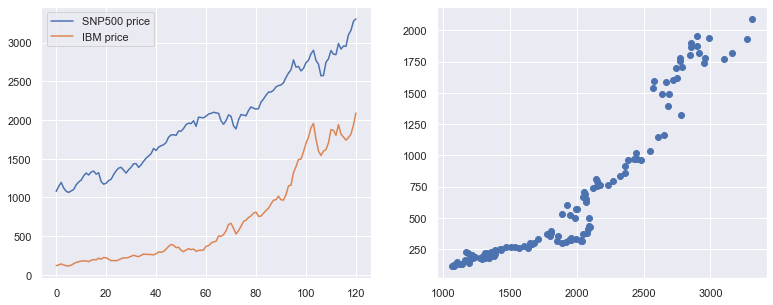

In [2]:
amzn_data = pd.read_csv('../Data/AMZN.csv',parse_dates =['Date'])
snp_data = pd.read_csv('../Data/GSPC.csv',parse_dates=['Date'])

snp_data['Price'] = (snp_data.High + snp_data.Low)*0.5
amzn_data['Price'] = (amzn_data.High + amzn_data.Low)*0.5

fig, ax = plt.subplots(1,2,figsize=(13,5))

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[0])
amzn_data['Price'].plot(label = 'IBM price',ax=ax[0])

X,y = snp_data['Price'].values,amzn_data.Price.values

ax[0].legend()

plt.scatter(snp_data['Price'],amzn_data['Price']);

Завдання: Побудова нелінійної регресії

* (A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків
𝑥 = 𝑟𝑚, 𝑦 = 𝑟𝑝
оцініть за допомогою нелінійних регресії (1-7) параметри $\alpha$ і $\beta$ для компанії.
* (B) Зробіть порівняльну характеристику для всіх моделей;
Модель | $R^2  | r |  F$
* (C) Оберіть найкращу з моделей і для неї проведіть повний статистичний аналіз.
* (D) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);
* (E) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього
місяця, та побудуйте довірчий інтервал.

Визначимо регресійні функції:

In [3]:
def exponential_1(x,alpha,beta):
    return alpha * np.power(beta,x)

def exponential_2(x,alpha,beta):
    return alpha * np.exp(beta*x)

def exponential_3(x,alpha,beta):
    return np.exp(alpha+beta*x)

def exponential_4(x,alpha,beta):
    return np.power(10,alpha+beta*x)

def multiplicative(x,alpha,beta):
    return alpha * x**beta

def inverse(x,alpha,beta):
    return alpha+beta/x

Загальний метод найменших квадратів для оцінки $\alpha, \beta$, обчислення $r, R^2, F$

In [4]:
class OLS(BaseEstimator):
    def __init__(self):
        super(OLS,self).__init__()
        
    def fit(self,X,y=None):
        self.r_,_ = pearsonr(X,y)
        
        self.beta_ = self.r_*(y.std())/X.std()
        self.alpha_ = y.mean() - X.mean()*self.beta_
        return self
        
    def predict(self,X,y=None):
        try:
            getattr(self, "beta_")
            getattr(self, "alpha_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        
        return self.alpha_ + X*self.beta_
    
    def coef_(self):
        return self.alpha_,self.beta_
    
    @staticmethod
    def r_squared(y,y_pred):
        return np.var(y_pred)/np.var(y)
  
    @staticmethod
    def f_statistic(y,y_pred):
        n=y.shape[0]
        R_2 = r2_score(y,y_pred)
        return (R_2*(n-2))/((1-R_2))
    
data_dicts = []

* Експоненційна регресія:
1. $y = \alpha*\beta^x \Leftrightarrow ln(y)=ln(\alpha) + ln(\beta)*x \Leftrightarrow y=exp(ln(\alpha) + ln(\beta)*x $

model coefficients: 
	alpha=30.4991, beta=1.0014
model characteristics: 
	r=0.9463,R^2=0.8869,F=932.7917


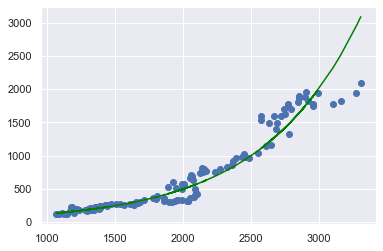

In [5]:
ols_model = OLS().fit(X,np.log(y))
ln_alpha, ln_beta = ols_model.coef_()
alpha,beta = np.exp(ln_alpha),np.exp(ln_beta)

y_hat = exponential_1(X,np.exp(ln_alpha),np.exp(ln_beta))

plt.scatter(X,y)
plt.plot(X,y_hat,c='green');
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
data_dicts.append({'Модель':'$\alpha* \beta^x$','$r$':r,'$R^2$':r_sq,'$F_{val}$':f_val})
print(f'model coefficients: \n\talpha={alpha:.4f}, beta={beta:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

2. $y = \alpha*e^{\beta x} \Leftrightarrow ln(y)= ln(\alpha) + b1* x \Leftrightarrow y = exp (ln\alpha + b1*x)  $

model coefficients: 
	alpha=30.4991, beta=0.0014
model characteristics: 
	r=0.9463,R^2=0.8869,F=932.7917


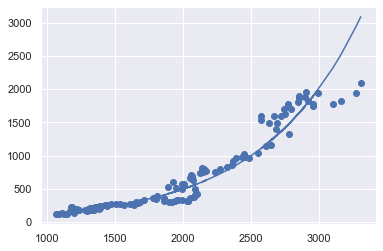

In [6]:
ols_model = OLS().fit(X,np.log(y))
b0,b1 = ols_model.coef_()
alpha,beta = np.exp(b0),b1
y_hat = exponential_2(X,alpha,beta)

plt.scatter(X,y)
plt.plot(X,y_hat)
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
data_dicts.append({'Модель':'$\alpha *e^( \beta x)$','$r$':r,'$R^2$':r_sq,'$F_{val}$':f_val})
print(f'model coefficients: \n\talpha={alpha:.4f}, beta={beta:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

3. $y = e^{b_0 +b_1*x} \Leftrightarrow ln(y)=b_0+b_1*x \Leftrightarrow y=exp(b_0+b_1*x)$

model coefficients: 
	b0=3.4177, b1=0.0014
model characteristics: 
	r=0.9463,R^2=0.8869,F=932.7917


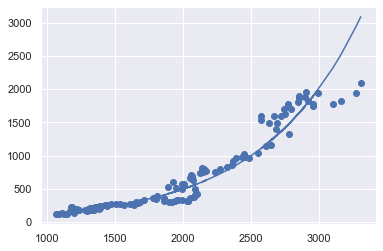

In [7]:
ols_model = OLS().fit(X,np.log(y))
b0,b1 = ols_model.coef_()
alpha,beta = b0,b1

y_hat = exponential_3(X,b0,b1)
plt.scatter(X,y)
plt.plot(X,y_hat)
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
data_dicts.append({'Модель':'$e^{b_0+b_1x}$','$r$':r,'$R^2$':r_sq,'$F_{val}$':f_val})
print(f'model coefficients: \n\tb0={alpha:.4f}, b1={beta:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

4. $y = 10^{b_0+b_1x} \Leftrightarrow log10(y) = b_0 + b_1 x \Leftrightarrow y = 10^{b_0 + b_1x}$

model coefficients: 
	b0=1.4843, b1=0.0006
model characteristics: 
	r=0.9463,R^2=0.8869,F=932.7917


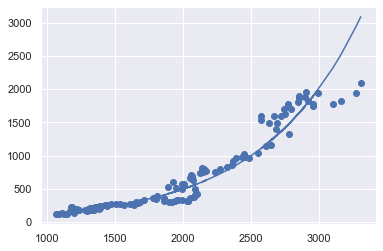

In [8]:
ols_model = OLS().fit(X,np.log10(y))
b0,b1 = ols_model.coef_()
y_hat = exponential_4(X,b0,b1)
plt.scatter(X,y)
plt.plot(X,y_hat)
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
data_dicts.append({'Модель':'$10^{b_0+b_1x}$','$r$':r,'$R^2$':r_sq,'$F_{val}$':f_val})
print(f'model coefficients: \n\tb0={b0:.4f}, b1={b1:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

Бачимо, що усі форми експоненційної регресії дають однаковий результат, що й випливає з формул зворотніх перетворень

* Мультипликативна регресія: $ y = \alpha*x^\beta \Leftrightarrow log(y)=log(\alpha) + log(x)*\beta$

model coefficients: 
	alpha=0.0000010009, beta=2.6510
model characteristics: 
	r=0.9674,R^2=0.9150,F=1281.5751


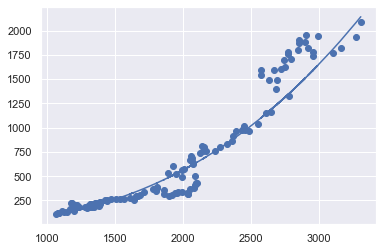

In [9]:
ols_model = OLS().fit(np.log(X),np.log(y))
b0,b1 = ols_model.coef_()
alpha,beta = np.exp(b0),b1

y_hat = multiplicative(X,alpha,beta)
plt.scatter(X,y)
plt.plot(X,y_hat)
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
data_dicts.append({'Модель':'$\alpha*x^{\beta}$','$r$':r,'$R^2$':r_sq,'$F_{val}$':f_val})
print(f'model coefficients: \n\talpha={alpha:.10f}, beta={beta:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

* Зворотна: $ y = \alpha + \beta*\frac{1}{x}$

model coefficients: 
	alpha=2225.5515, beta=-2742595.2958
model characteristics: 
	r=0.8161,R^2=0.6660,F=237.2997


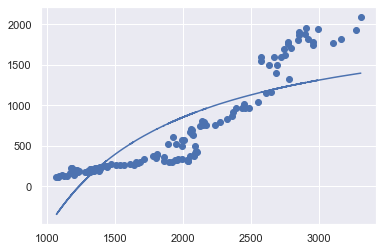

In [10]:
ols_model = OLS().fit(1/X,y)
alpha,beta = ols_model.coef_()
y_hat = inverse(X,alpha,beta)
plt.scatter(X,y)

plt.plot(X,y_hat)
r,r_sq,f_val = pearsonr(y,y_hat)[0],r2_score(y,y_hat),OLS.f_statistic(y,y_hat)
data_dicts.append({'Модель':'$\alpha+ \beta \frac{1}{x}$','$r$':r,'$R^2$':r_sq,'$F_{val}$':f_val})
print(f'model coefficients: \n\talpha={alpha:.4f}, beta={beta:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

In [11]:
x = pd.DataFrame.from_records(data_dicts)

Порівняльна характеристика для всіх моделей:

|    | Модель                    |      $r$ |    $R^2$ |   $F_{val}$ |
|---:|:--------------------------|---------:|---------:|------------:|
|  0 | $\alpha*\beta^x$                   | 0.946273 | 0.88686  |     932.792 |
|  1 | $ \alpha *e^{\beta x}$                   | 0.946273 | 0.88686  |     932.792 |
|  2 | $e^{b_0+b_1x}$      | 0.946273 | 0.88686  |     932.792 |
|  3 | $10^{b_0+b_1x}$     | 0.946273 | 0.88686  |     932.792 |
|  4 | $ \alpha*x^{\beta }$                   | 0.967445 | 0.915035 |    1281.58  |
|  5 | $ \alpha+\beta \frac{1}{x}$                   | 0.816095 | 0.666012 |     237.3   |

Зі значень $r, R^2, F$ можемо зробити висновок, що в даному випадку мультипликативна регресія прогнозує найкраще, а зворотна регресія - найгірше

(C) Оберіть найкращу з моделей і для неї проведіть повний статистичний аналіз.

Розглядаємо мультипликативну модель:

In [12]:
import statsmodels.api as sm
x = sm.add_constant(np.log(X))
model = sm.OLS(np.log(y), x)
lin = model.fit()
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1548.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           4.73e-70
Time:                        09:07:35   Log-Likelihood:                 5.6934
No. Observations:                 121   AIC:                            -7.387
Df Residuals:                     119   BIC:                            -1.795
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8146      0.509    -27.150      0.000     -14.822     -12.807
x1             2.6510      0.067     39.340      0.000       2.518       2.784
==============================================================================
Omnibus:                       16.206   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.200
Skew:                          -0.900   Prob(JB):                     0.000112
Kurtosis:                       3.608   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(D) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);

(E) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього
місяця, та побудуйте довірчий інтервал.